
<center><img src="bandera.png"></center>


<center><h1>  Inmigración a Canadá </h1></center>
<br>


# Conjunto de datos: Inmigración a Canada desde 1980 a 2013.




### Contexto Empresarial 

<br>

<p>Canadá ha experimentado un aumento en número de inmigrantes durante los ultimos tiempos. Quieren saber el numero de inmigrantes. Para ello han contratado un equipo para poder determinar si se trata de al estacional durante el tiempo o solo un patrón aislado.</p>

### Problema Comercial

<p> Proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente</p>

### Contexto Analítico

¿Cómo ha fluctuado el número de inmigración durante el último año ? ¿Han aumentado con el tiempo?<br>
¿Durante que periodo del año se producen la mayor cantidad de inmigración?<br>
¿Cuál es la proporción de recuento?¿De qué nacionalidades son la mayor cantidad de inmigrandes en proporcion con el total?<br>


Para dar un poco mas de contexto sobre el analisis realizado, la pagina de la [BBC NEWS MUNDO](https://www.bbc.com/mundo/noticias-internacional-63503376) ha publica un articulo con fecha del 3 de noviembre del 2022, con el siguiente titulo:

### Canadá  necesita 1,4 millones de inmigrantes para ocupar puestos vacantes
<img src=noticia.png>

En este articulo el ministro de Inmigración de Canadá, Sean Fraser, expreso los planes que tiene el pais para poder ir incorporando a los inmigrantes.

# Presentación y objetivos del modelo

 <center> <h3>Inmigración en Canada entre los años 1980 - 2013 - Abstrac</h3> </center>
<br>
<br>

<p>Este analsis se centra en poder determinar como Canadá, durante la década de los 70 en adelante se produjo una masiva migración hacia sus tierra, producto de sus políticas migratoria. Segun afirma Barragán(2020) en su analisis <em>"fue definitiva para consolidarse como una nación pionera en la adopción del multiculturalismo como política de Estado. Para tal fin, en 1973 se creó en “Ottawa el Ministerio de Multiculturalismo y, en 1988 esta idea se convirtió en principio básico del Estado a través de la Ley de Multiculturalismo</em>.(p.60),lo cual produjo durante estos periodos un alto nivel de inmigración.</p> <p> Que insta a interpretar la constitución canadiense desde ese marco teórico y a promoverlo activamente”. Así que en cuanto a leyes y en instituciones que materializan esta normatividad, Canadá presenta una evolución la cual se reafirma y se reajusta con el paso de los años y las situaciones que tienen que enfrentar.</p>
<p> Como asi tambien ver que otra variable a analizar es como afirma, Ocampo (2009) Tras dos décadas caracterizadas por el recrudecimiento de las crisis monetarias y financieras y un crecimiento mediocre y volátil, América Latina ha experimentado en los años 2000 un fuerte dinamismo de la actividad económica y ha reducido su vulnerabilidad financiera. Esto ha permitido que la región resista bien frente a la crisis económica internacional desatada en 2007, que la afectó más por el canal comercial que a través del canal financiero.</p>

<p>¿Cómo influyo las políticas migratorias la inmigración hacia Canadá?</p>

<p>¿Que modelo ML puede analizar y precidecir mejor la inmigración ?</p>



# Librerias, descarga y preparación de datos


In [1]:
!pip install openpyxl

In [2]:
import numpy as np  # util para computación científica en Python
import pandas as pd # biblioteca que contienen la estructura de datos de uso principal
import warnings
warnings.filterwarnings("ignore")

# manejo de data
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

In [3]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh as bk
from bokeh.io import output_notebook
import pygwalker as pyg

## Data Acquisition - Obtención de datos

In [5]:
df_can = pd.read_excel(
    'datos/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

## Analisis preliminar con Pandas Profiling -  Data Wrangling - Exploratory Data Analysis (EDA)

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_can)
prof.to_file(output_file='output.html')

In [7]:
# dimensión del Dataframe (rows, columns)
df_can.shape   

(195, 43)

In [8]:
# Infomación sobre los datos
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [9]:
# Verifica si hay nulos
df_can.notnull()

Type  Coverage  OdName  AREA  AreaName   REG  RegName   DEV  DevName  \
0    True      True    True  True      True  True     True  True     True   
1    True      True    True  True      True  True     True  True     True   
2    True      True    True  True      True  True     True  True     True   
3    True      True    True  True      True  True     True  True     True   
4    True      True    True  True      True  True     True  True     True   
..    ...       ...     ...   ...       ...   ...      ...   ...      ...   
190  True      True    True  True      True  True     True  True     True   
191  True      True    True  True      True  True     True  True     True   
192  True      True    True  True      True  True     True  True     True   
193  True      True    True  True      True  True     True  True     True   
194  True      True    True  True      True  True     True  True     True   

     1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0    True  True  True  True  True  True  True  True  True  True  True  True   
1    True  True  True  True  True  True  True  True  True  True  True  True   
2    True  True  True  True  True  True  True  True  True  True  True  True   
3    True  True  True  True  True  True  True  True  True  True  True  True   
4    True  True  True  True  True  True  True  True  True  True  True  True   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
190  True  True  True  True  True  True  True  True  True  True  True  True   
191  True  True  True  True  True  True  True  True  True  True  True  True   
192  True  True  True  True  True  True  True  True  True  True  True  True   
193  True  True  True  True  True  True  True  True  True  True  True  True   
194  True  True  True  True  True  True  True  True  True  True  True  True   

     1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
0    True  True  True  True  True  True  True  True  True  True  True  True   
1    True  True  True  True  True  True  True  True  True  True  True  True   
2    True  True  True  True  True  True  True  True  True  True  True  True   
3    True  True  True  True  True  True  True  True  True  True  True  True   
4    True  True  True  True  True  True  True  True  True  True  True  True   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
190  True  True  True  True  True  True  True  True  True  True  True  True   
191  True  True  True  True  True  True  True  True  True  True  True  True   
192  True  True  True  True  True  True  True  True  True  True  True  True   
193  True  True  True  True  True  True  True  True  True  True  True  True   
194  True  True  True  True  True  True  True  True  True  True  True  True   

     2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
0    True  True  True  True  True  True  True  True  True  True  
1    True  True  True  True  True  True  True  True  True  True  
2    True  True  True  True  True  True  True  True  True  True  
3    True  True  True  True  True  True  True  True  True  True  
4    True  True  True  True  True  True  True  True  True  True  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
190  True  True  True  True  True  True  True  True  True  True  
191  True  True  True  True  True  True  True  True  True  True  
192  True  True  True  True  True  True  True  True  True  True  
193  True  True  True  True  True  True  True  True  True  True  
194  True  True  True  True  True  True  True  True  True  True  

[195 rows x 43 columns]

<AxesSubplot:>

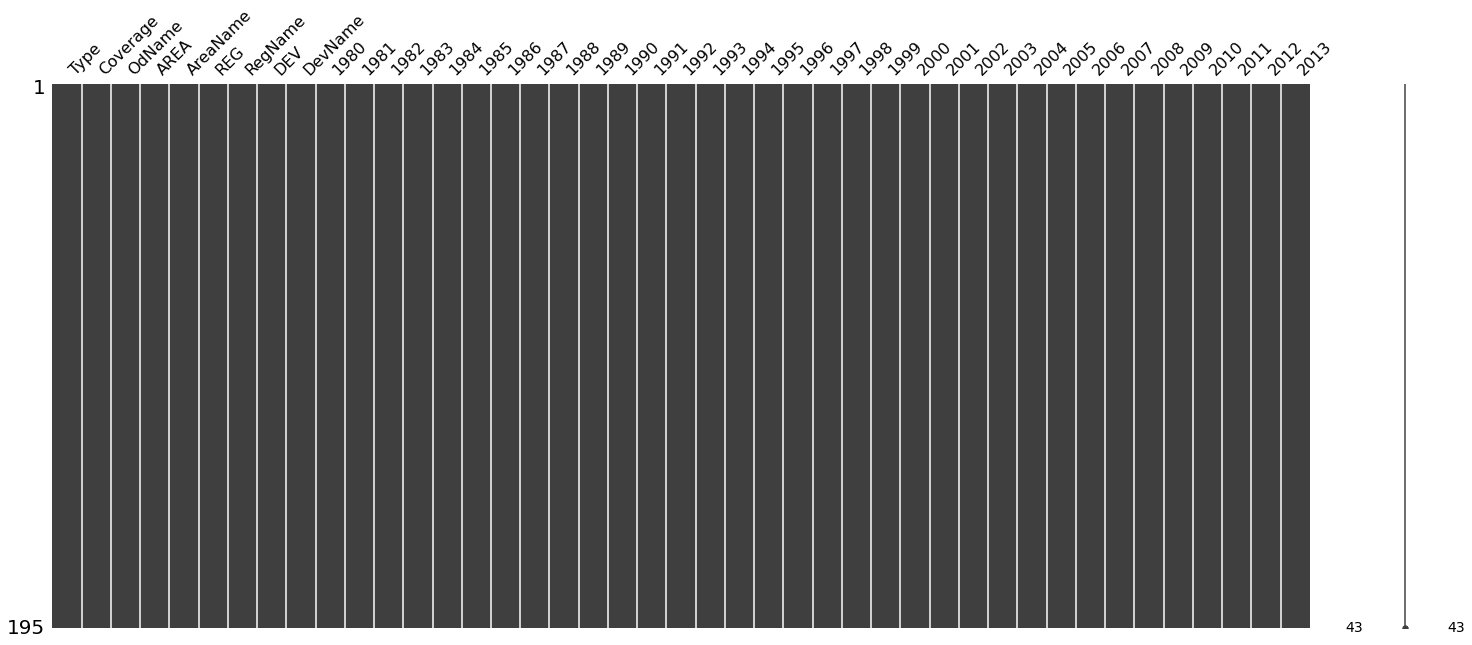

In [10]:
import missingno as msno
msno.matrix(df_can)

Podemos observar que en df_can no hay ningun dato nulo y que todas las columnas poseen los respectivos datos.

In [11]:
# Resumen estadístico
df_can.describe(include = "all")

Type    Coverage       OdName    AREA AreaName      REG  \
count          195         195          195 195.000      195  195.000   
unique           1           2          195     NaN        6      NaN   
top     Immigrants  Foreigners  Afghanistan     NaN   Africa      NaN   
freq           195         194            1     NaN       54      NaN   
mean           NaN         NaN          NaN 912.764      NaN 1249.015   
std            NaN         NaN          NaN  13.083      NaN 1185.527   
min            NaN         NaN          NaN 903.000      NaN  905.000   
25%            NaN         NaN          NaN 903.000      NaN  914.000   
50%            NaN         NaN          NaN 908.000      NaN  922.000   
75%            NaN         NaN          NaN 922.000      NaN  925.500   
max            NaN         NaN          NaN 935.000      NaN 5501.000   

             RegName     DEV             DevName      1980      1981  \
count            195 195.000                 195   195.000   195.000   
unique            22     NaN                   2       NaN       NaN   
top     Western Asia     NaN  Developing regions       NaN       NaN   
freq              18     NaN                 147       NaN       NaN   
mean             NaN 901.754                 NaN   508.395   566.990   
std              NaN   0.432                 NaN  1949.589  2152.644   
min              NaN 901.000                 NaN     0.000     0.000   
25%              NaN 902.000                 NaN     0.000     0.000   
50%              NaN 902.000                 NaN    13.000    10.000   
75%              NaN 902.000                 NaN   251.500   295.500   
max              NaN 902.000                 NaN 22045.000 24796.000   

            1982      1983      1984     1985     1986      1987      1988  \
count    195.000   195.000   195.000  195.000  195.000   195.000   195.000   
unique       NaN       NaN       NaN      NaN      NaN       NaN       NaN   
top          NaN       NaN       NaN      NaN      NaN       NaN       NaN   
freq         NaN       NaN       NaN      NaN      NaN       NaN       NaN   
mean     534.723   387.436   376.497  358.862  441.272   691.133   714.390   
std     1866.998  1204.334  1198.246 1079.310 1225.577  2109.206  2443.607   
min        0.000     0.000     0.000    0.000    0.000     0.000     0.000   
25%        0.000     0.000     0.000    0.000    0.500     0.500     1.000   
50%       11.000    12.000    13.000   17.000   18.000    26.000    34.000   
75%      275.000   173.000   181.000  197.000  254.000   434.000   409.000   
max    20620.000 10015.000 10170.000 9564.000 9470.000 21337.000 27359.000   

            1989      1990      1991      1992      1993      1994      1995  \
count    195.000   195.000   195.000   195.000   195.000   195.000   195.000   
unique       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
top          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
freq         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
mean     843.241   964.379  1064.149  1136.856  1138.713   993.154   962.626   
std     2555.049  3158.730  2952.094  3330.084  3495.220  3613.336  3091.492   
min        0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%        1.000     2.000     3.000     6.500    11.500     9.500    10.500   
50%       44.000    38.000    51.000    74.000    85.000    76.000    91.000   
75%      508.500   612.500   657.500   655.000   722.500   545.000   550.500   
max    23795.000 31668.000 23380.000 34123.000 33720.000 39231.000 30145.000   

            1996      1997      1998      1999      2000      2001      2002  \
count    195.000   195.000   195.000   195.000   195.000   195.000   195.000   
unique       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
top          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
freq         NaN       NaN       NaN       NaN       N

In [12]:
# Primeros datos del Dataframe
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  1981  1982  1983  1984  \
0    Southern Asia  902  Developing regions    16    39    39    47    71   
1  Southern Europe  901   Developed regions     1     0     0     0     0   
2  Northern Africa  902  Developing regions    80    67    71    69    63   
3        Polynesia  902  Developing regions     0     1     0     0     0   
4  Southern Europe  901   Developed regions     0     0     0     0     0   

   1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  \
0   340   496   741   828  1076  1028  1378  1170   713   858  1537  2212   
1     0     1     2     2     3     3    21    56    96    71    63   113   
2    44    69   132   242   434   491   872   795   717   595  1106  2054   
3     0     0     1     0     1     2     0     0     0     0     0     0   
4     0     2     0     0     0     3     0     1     0     0     0     0   

   1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
0  2555  1999  2395  3326  4067  3697  3479  2978  3436  3009  2652  2111   
1   307   574  1264  1816  1602  1021   853  1450  1223   856   702   560   
2  1842  2292  2389  2867  3418  3406  3072  3616  3626  4807  3623  4005   
3     0     0     0     0     0     0     0     0     0     1     0     0   
4     0     2     0     0     1     0     2     0     0     1     1     0   

   2009  2010  2011  2012  2013  
0  1746  1758  2203  2635  2004  
1   716   561   539   620   603  
2  5393  4752  4325  3774  4331  
3     0     0     0     0     0  
4     0     0     0     1     1

In [13]:
# Ultimos datos del Dataframe
df_can.tail(5)

Type    Coverage          OdName  AREA AreaName  REG  \
190  Immigrants  Foreigners        Viet Nam   935     Asia  920   
191  Immigrants  Foreigners  Western Sahara   903   Africa  912   
192  Immigrants  Foreigners           Yemen   935     Asia  922   
193  Immigrants  Foreigners          Zambia   903   Africa  910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa  910   

                RegName  DEV             DevName  1980  1981  1982  1983  \
190  South-Eastern Asia  902  Developing regions  1191  1829  2162  3404   
191     Northern Africa  902  Developing regions     0     0     0     0   
192        Western Asia  902  Developing regions     1     2     1     6   
193      Eastern Africa  902  Developing regions    11    17    11     7   
194      Eastern Africa  902  Developing regions    72   114   102    44   

     1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  \
190  7583  5907  2741  1406  1411  3004  3801  5870  5416  6547  5105  3723   
191     0     0     0     0     0     0     0     1     0     0     0     0   
192     0    18     7    12     7    18     4    18    41    41    39    73   
193    16     9    15    23    44    68    77    69    73    46    51    41   
194    32    29    43    68    99   187   129    94    61    72    78    58   

     1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  \
190  2462  1752  1631  1419  1803  2117  2291  1713  1816  1852  3153  2574   
191     0     0     0     0     0     0     0     0     0     0     1     0   
192   144   121   141   134   122   181   171   113   124   161   140   122   
193    34    72    34    51    39    78    50    46    56    91    77    71   
194    39    44    43    49    98   110   191   669  1450   615   454   663   

     2008  2009  2010  2011  2012  2013  
190  1784  2171  1942  1723  1731  2112  
191     0     0     0     0     0     0  
192   133   128   211   160   174   217  
193    64    60   102    69    46    59  
194   611   508   494   434   437   407

In [14]:
# Muestra las columnas que conforman el Dataframe
df_can.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

#### Eliminar las columnas que no son informativas para la visualización.

In [15]:
df_can.drop(['DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

OdName  AREA AreaName   REG          RegName             DevName  \
0     Afghanistan   935     Asia  5501    Southern Asia  Developing regions   
1         Albania   908   Europe   925  Southern Europe   Developed regions   
2         Algeria   903   Africa   912  Northern Africa  Developing regions   
3  American Samoa   909  Oceania   957        Polynesia  Developing regions   
4         Andorra   908   Europe   925  Southern Europe   Developed regions   

   1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
0    16    39    39    47    71   340   496   741   828  1076  1028  1378   
1     1     0     0     0     0     0     1     2     2     3     3    21   
2    80    67    71    69    63    44    69   132   242   434   491   872   
3     0     1     0     0     0     0     0     1     0     1     2     0   
4     0     0     0     0     0     0     2     0     0     0     3     0   

   1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
0  1170   713   858  1537  2212  2555  1999  2395  3326  4067  3697  3479   
1    56    96    71    63   113   307   574  1264  1816  1602  1021   853   
2   795   717   595  1106  2054  1842  2292  2389  2867  3418  3406  3072   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     1     0     0     0     0     0     2     0     0     1     0     2   

   2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
0  2978  3436  3009  2652  2111  1746  1758  2203  2635  2004  
1  1450  1223   856   702   560   716   561   539   620   603  
2  3616  3626  4807  3623  4005  5393  4752  4325  3774  4331  
3     0     0     1     0     0     0     0     0     0     0  
4     0     0     1     1     0     0     0     0     1     1

#### Renombrar las columnas

In [16]:
df_can.rename(columns={'OdName':'Country',"AREA":"Cod_continet", 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

Country  Cod_continet Continent   REG           Region  \
0     Afghanistan           935      Asia  5501    Southern Asia   
1         Albania           908    Europe   925  Southern Europe   
2         Algeria           903    Africa   912  Northern Africa   
3  American Samoa           909   Oceania   957        Polynesia   
4         Andorra           908    Europe   925  Southern Europe   

              DevName  1980  1981  1982  1983  1984  1985  1986  1987  1988  \
0  Developing regions    16    39    39    47    71   340   496   741   828   
1   Developed regions     1     0     0     0     0     0     1     2     2   
2  Developing regions    80    67    71    69    63    44    69   132   242   
3  Developing regions     0     1     0     0     0     0     0     1     0   
4   Developed regions     0     0     0     0     0     0     2     0     0   

   1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  \
0  1076  1028  1378  1170   713   858  1537  2212  2555  1999  2395  3326   
1     3     3    21    56    96    71    63   113   307   574  1264  1816   
2   434   491   872   795   717   595  1106  2054  1842  2292  2389  2867   
3     1     2     0     0     0     0     0     0     0     0     0     0   
4     0     3     0     1     0     0     0     0     0     2     0     0   

   2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0  4067  3697  3479  2978  3436  3009  2652  2111  1746  1758  2203  2635   
1  1602  1021   853  1450  1223   856   702   560   716   561   539   620   
2  3418  3406  3072  3616  3626  4807  3623  4005  5393  4752  4325  3774   
3     0     0     0     0     0     1     0     0     0     0     0     0   
4     1     0     2     0     0     1     1     0     0     0     0     1   

   2013  
0  2004  
1   603  
2  4331  
3     0  
4     1

In [17]:
#Estamos viendo de que manera se encuentran disctibuidos las variables categoricas.
contar = df_can[["Continent", "REG", "Region", "DevName"]].value_counts()
print(contar)

Continent                        REG   Region                     DevName           
Asia                             922   Western Asia               Developing regions    18
Africa                           910   Eastern Africa             Developing regions    17
                                 914   Western Africa             Developing regions    16
Europe                           925   Southern Europe            Developed regions     14
Latin America and the Caribbean  915   Caribbean                  Developing regions    13
                                 931   South America              Developing regions    12
Europe                           924   Northern Europe            Developed regions     10
                                 923   Eastern Europe             Developed regions     10
Asia                             920   South-Eastern Asia         Developing regions    10
                                 5501  Southern Asia              Developing regions     9
Afric

In [18]:
#Seleccionar columnas por years y continent para hacer una time line

In [19]:
df_can.columns = list(map(str, df_can.columns))

# comprobar el tipo de las etiquetas de las columnas
all(isinstance(column, str) for column in df_can.columns)

True

In [20]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

Country  Cod_continet Continent   REG           Region  \
0     Afghanistan           935      Asia  5501    Southern Asia   
1         Albania           908    Europe   925  Southern Europe   
2         Algeria           903    Africa   912  Northern Africa   
3  American Samoa           909   Oceania   957        Polynesia   
4         Andorra           908    Europe   925  Southern Europe   

              DevName  1980  1981  1982  1983  1984  1985  1986  1987  1988  \
0  Developing regions    16    39    39    47    71   340   496   741   828   
1   Developed regions     1     0     0     0     0     0     1     2     2   
2  Developing regions    80    67    71    69    63    44    69   132   242   
3  Developing regions     0     1     0     0     0     0     0     1     0   
4   Developed regions     0     0     0     0     0     0     2     0     0   

   1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  \
0  1076  1028  1378  1170   713   858  1537  2212  2555  1999  2395  3326   
1     3     3    21    56    96    71    63   113   307   574  1264  1816   
2   434   491   872   795   717   595  1106  2054  1842  2292  2389  2867   
3     1     2     0     0     0     0     0     0     0     0     0     0   
4     0     3     0     1     0     0     0     0     0     2     0     0   

   2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
0  4067  3697  3479  2978  3436  3009  2652  2111  1746  1758  2203  2635   
1  1602  1021   853  1450  1223   856   702   560   716   561   539   620   
2  3418  3406  3072  3616  3626  4807  3623  4005  5393  4752  4325  3774   
3     0     0     0     0     0     1     0     0     0     0     0     0   
4     1     0     2     0     0     1     1     0     0     0     0     1   

   2013  Total  
0  2004  65075  
1   603  17532  
2  4331  71254  
3     0   1872  
4     1   1848

In [21]:
continente= df_can["Continent"]


In [22]:
total= df_can["Total"]


In [23]:
df_contienten_total = pd.concat([continente, total], axis=1)


In [24]:
df_con =  df_contienten_total.groupby("Continent", axis=0).sum()
df_con

Total
Continent                               
Africa                            716952
Asia                             3472756
Europe                           1489745
Latin America and the Caribbean   825375
Northern America                  244762
Oceania                            81110

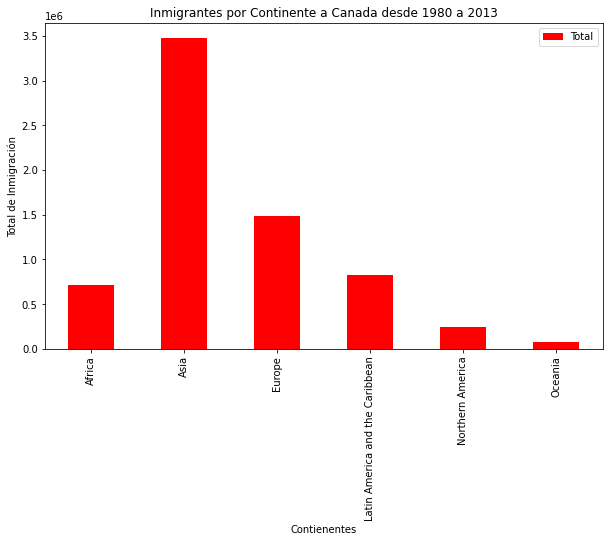

In [25]:
df_con.plot(kind="bar",color="red", figsize=(10,6))

plt.xlabel("Contienentes") # agrega al gráfico la etiqueta del eje x
plt.ylabel("Total de Inmigración") # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes por Continente a Canada desde 1980 a 2013') # agrega al gráfico el título
#plt.yscale('symlog')
#plt.set_yticks("Total")#, labels=people

plt.show()

In [26]:
#unificar los datos de las americas


In [27]:
print('Dimensión de los datos:', df_can.shape)

Dimensión de los datos: (195, 41)


In [28]:
paises = df_can["Country"]

In [29]:
df_paises_total = pd.concat([paises, total], axis=1)


In [30]:
df_paises_total.sort_values(['Total'], ascending=False, axis=0, inplace=True) #selecciona los valoeres mas altos

# obtener las 10 mejores entradas
df_paises10 = df_paises_total.head(10)

# transponer el dataframe
#df_top5 = df_top5[years].transpose()

df_paises10.head()

Country   Total
79                                               India  698340
36                                               China  661803
183  United Kingdom of Great Britain and Northern I...  553332
136                                        Philippines  513246
130                                           Pakistan  248036

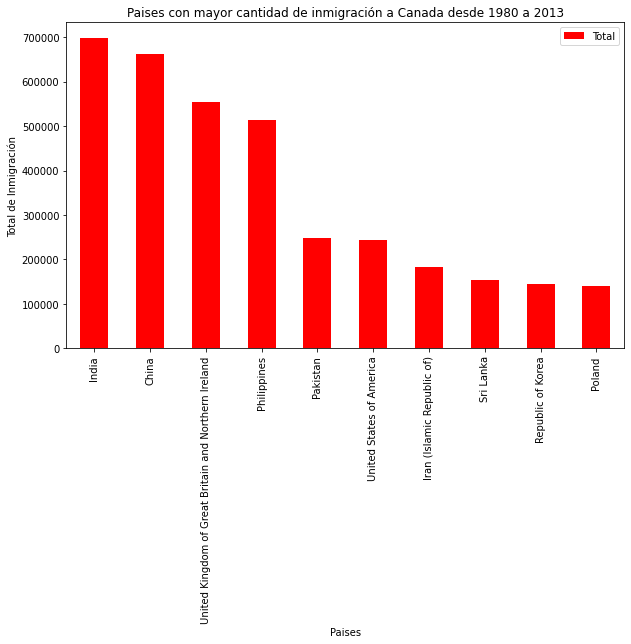

In [31]:
df_paises10.plot(kind="bar",color="red", figsize=(10,6), x = "Country")

plt.xlabel("Paises") # agrega al gráfico la etiqueta del eje x
plt.ylabel("Total de Inmigración") # agrega al gráfico la etiqueta del eje y
plt.title('Paises con mayor cantidad de inmigración a Canada desde 1980 a 2013') # agrega al gráfico el título

plt.show()

In [32]:
gwalker = pyg.walk(df_can)

<center><img src="gw chart 335880.png"></center>

# Gráfico de Áreas

In [33]:
# Se crea una lista de años desde 1980 - 2013

years = list(map(str, range(1980, 2014)))

In [34]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True) #selecciona los valoeres mas altos

# obtener las 5 mejores entradas
df_top5 = df_can.head()

# transponer el dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

79    36     183   136   130
1980  8880  5123  22045  6051   978
1981  8670  6682  24796  5921   972
1982  8147  3308  20620  5249  1201
1983  7338  1863  10015  4562   900
1984  5704  1527  10170  3801   668

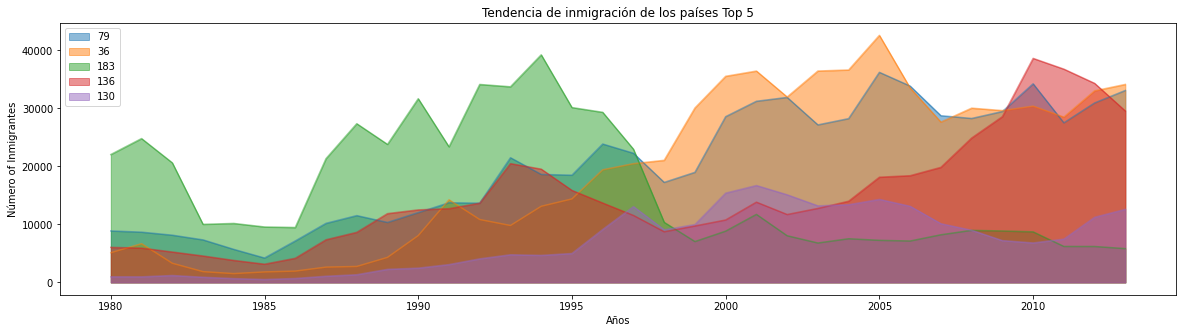

In [35]:
# se cambia los valores de índice de df_top5 para escribir un número entero para graficar
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 5))  # pasa un tamaño en la tupla (x, y)

plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

plt.show()

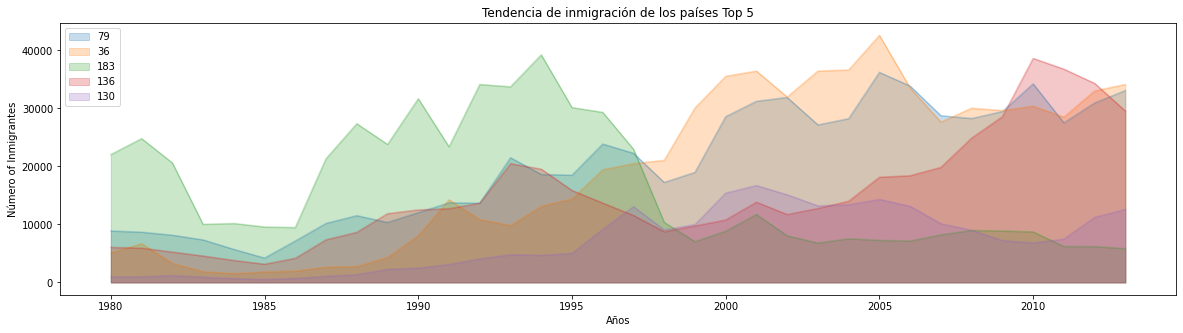

In [36]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, valor por defecto alpha = 0.5
             stacked=False,
             figsize=(20, 5))

plt.title('Tendencia de inmigración de los países Top 5')
plt.ylabel('Número of Inmigrantes')
plt.xlabel('Años')

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0.5, 0, 'Años')

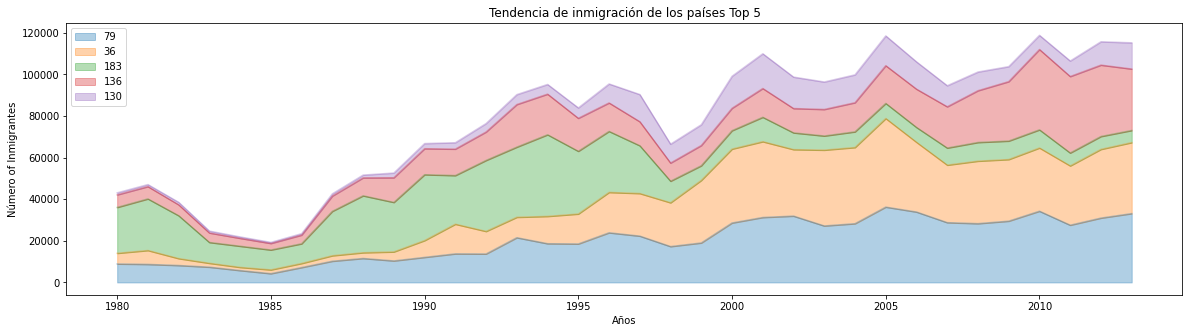

In [37]:
# Grafico con más flexibilidad
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 5))
print(type(ax))

ax.set_title('Tendencia de inmigración de los países Top 5')
ax.set_ylabel('Número of Inmigrantes')
ax.set_xlabel('Años')

## Histograma

¿Cuál es la distribución de frecuencias del número (población) de nuevos inmigrantes de varios países a Canadá en 2013?

In [38]:
# Vista rápida de los datos de 2013
df_can['2013'].head()

79     33087
36     34129
183     5827
136    29544
130    12603
Name: 2013, dtype: int64

In [39]:
# np.histogram devuelve 2 valores
contador, bordes_contenedores = np.histogram(df_can['2013'])

print(contador) # Contador de frecuencias
print(bordes_contenedores) # rango de contenedores, por defecto = 10 contenedores

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


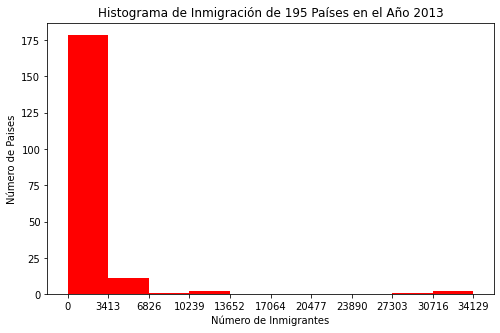

In [40]:
# 'bordes_contenedores' es una lista de intervalos de contenedores
contador, bordes_contenedores = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bordes_contenedores, color="red")

plt.title('Histograma de Inmigración de 195 Países en el Año 2013') # agregar un título al histograma
plt.ylabel('Número de Paises') # agregar etiqueta al eje y
plt.xlabel('Número de Inmigrantes') # agregar etiqueta al eje x

plt.show()

## Gráfico de Barras 

**Se empezará analizando el efecto de la crisis financiera de Islandia:**

La crisis financiera islandesa de 2008 - 2011 fue un evento económico y político importante en Islandia. En relación con el tamaño de su economía, el colapso bancario sistémico de Islandia fue el mayor experimentado por cualquier país en la historia económica. La crisis condujo a una grave depresión económica entre 2008 y 2011 ya un importante malestar político.

**Pregunta:** Comparar el número de inmigrantes islandeses (country = 'Iceland') en Canadá desde el año 1980 hasta el 2013.

In [41]:
df_can.set_index('Country', inplace=True)

# mostrar los primeros cinco elementos para ver cómo se cambió el dataframe
df_can.head()

Cod_continet Continent  \
Country                                                                      
India                                                        935      Asia   
China                                                        935      Asia   
United Kingdom of Great Britain and Northern Ir...           908    Europe   
Philippines                                                  935      Asia   
Pakistan                                                     935      Asia   

                                                     REG              Region  \
Country                                                                        
India                                               5501       Southern Asia   
China                                                906        Eastern Asia   
United Kingdom of Great Britain and Northern Ir...   924     Northern Europe   
Philippines                                          920  South-Eastern Asia   
Pakistan                                            5501       Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986   1987  \
Country                                                                        
India                                                5704  4211  7150  10189   
China                                                1527  1816  1960   2643   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  21337   
Philippines                                          3801  3150  4166   7360   
Pakistan                                              668   514   691   1072   

                                                     1988   1989   1990  \
Country                                                                   
India                                               11522  10343  12041   
China                                                2758   4323   8076   
United Kingdom of Great Britain and Northern Ir...  27359  23795  31668   
Philippines                                          8639  11865  12509   
Pakistan                                             1334   2261   2470   

                                                     1991   1992   1993  \
Country                                                                   
India                                               13734  13673  21496   
China                                               14255  10846   9817   
United Kingdom of Great Britain and Northern Ir...  23380  34123  33720   
Philippines                                         12718  13670  20479   
Pakistan                                             3079   4071   4777   

                                                     1994   1995   1996  \
Country                                                                   
India                                               18620  18489  23859   
China       

In [42]:
# obtener los datos
df_islandia = df_can.loc['Iceland', years]
df_islandia.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

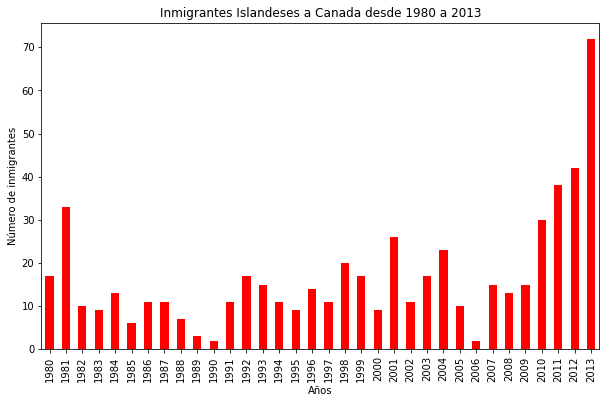

In [43]:
# graficar los datos
df_islandia.plot(kind='bar', figsize=(10, 6), color= "red")

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013') # agrega al gráfico el título

plt.show()

El gráfico de barras de arriba muestra el número total de inmigrantes desglosados ​​por cada año. Podemos ver claramente el impacto de la crisis financiera; el número de inmigrantes a Canadá comenzó a aumentar rápidamente después de 2008.

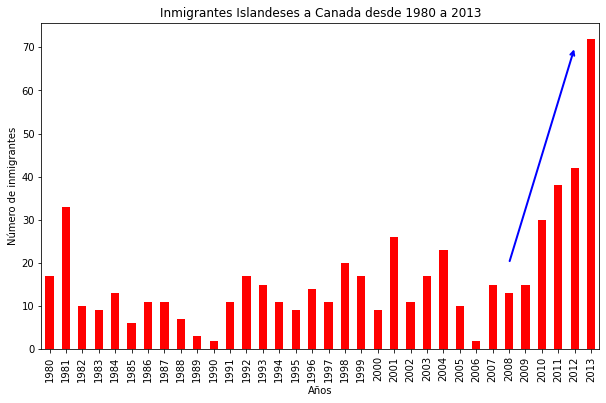

In [44]:
df_islandia.plot(kind='bar', figsize=(10, 6), rot=90, color="red")  # rota las marcas del eje x (puntos etiquetados en el eje x) en 90 grados

plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013')

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(32, 70),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(28, 20),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

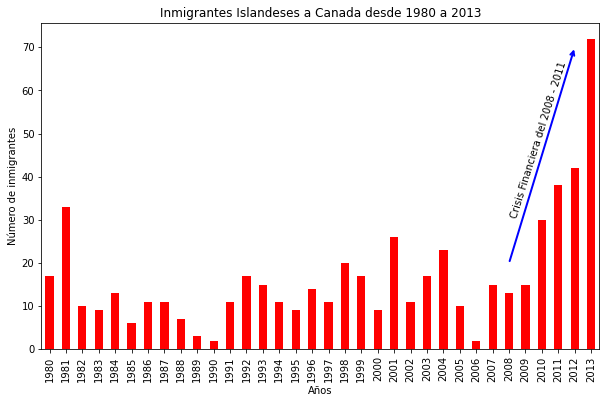

In [45]:
df_islandia.plot(kind='bar', figsize=(10, 6), rot=90, color="red")

plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.title('Inmigrantes Islandeses a Canada desde 1980 a 2013')

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(32, 70),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(28, 20),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Texto de la anotación
plt.annotate('Crisis Financiera del 2008 - 2011',  # texto a mostrar
             xy=(28, 30),  # comienzo del texto en el punto (año 2008 , pobla 30)
             rotation=72.5,  # Basado en la técnica de prueba y error para calzar con la flecha
             va='bottom',  # alineación vertical
             ha='left',  # alineación horizontal
             )

plt.show()

In [46]:
df_arg = df_can.loc['Argentina', years]
df_arg.head()


1980    368
1981    426
1982    626
1983    241
1984    237
Name: Argentina, dtype: object

<AxesSubplot:xlabel='Argentina', ylabel='Count'>

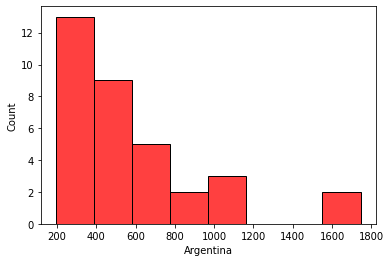

In [47]:
sns.histplot(data=df_arg, color="red")

<center> <h2> Crisis económica en Argentina entre 2001-2005 </center></h2>

A partir del 2006 empieza a disminuir la inmigración producto de la estabilidad económica en ese país.

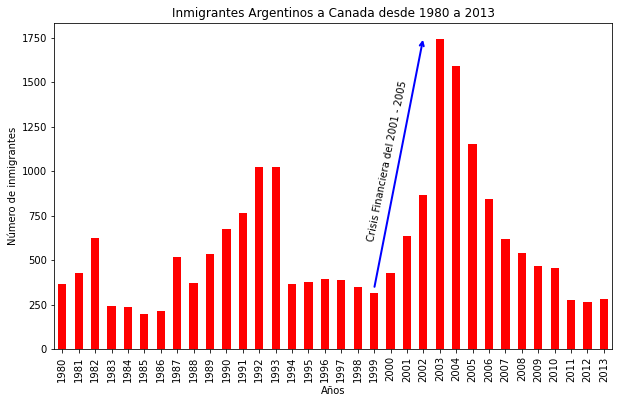

In [48]:
#ax=sns.countplot(x="years", hue="smoker", data= df_arg)
df_arg.plot(kind='bar', figsize=(10, 6), color="red")

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de inmigrantes') # agrega al gráfico la etiqueta del eje y
plt.title('Inmigrantes Argentinos a Canada desde 1980 a 2013') # agrega al gráfico el título

# flecha de la anotación
plt.annotate('',  # s: str. Dejar en blanco para que no haya texto
             xy=(22, 1750),  # posiciona la cabeza de la flecha en el punto (alo 2012 , pobla 70)
             xytext=(19, 340),  # pociciona la base de la flecha en el punto (año 2008 , pobla 20)
             xycoords='data',  # se usará el sistema de coordenada del objeto donde se esta haciendo la anotación
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
# Texto de la anotación
plt.annotate('Crisis Financiera del 2001 - 2005',  # texto a mostrar
             xy=(18.5, 600),  # comienzo del texto en el punto (año 2008 , pobla 30)
             rotation=78.5,  # Basado en la técnica de prueba y error para calzar con la flecha
             va='bottom',  # alineación vertical
             ha='left',  # alineación horizontal
             )
             
plt.show()

Vemos que durante los años 2000 a 2003, se produce la mayor cantidad de migracion de Argentia a Canada, pero a partir del 2004 empieza a diminuir.

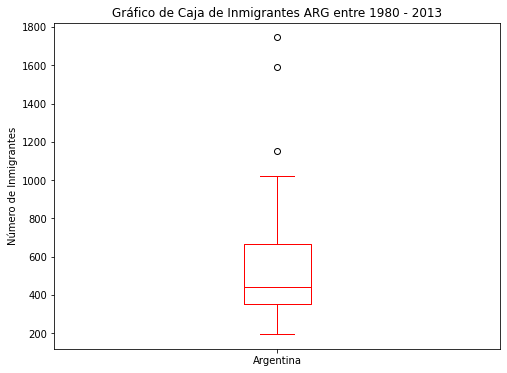

In [49]:
df_arg.plot(kind='box', figsize=(8, 6), color="red")

plt.title('Gráfico de Caja de Inmigrantes ARG entre 1980 - 2013')
plt.ylabel('Número de Inmigrantes')

plt.show()

En este gráfico podemos observar como se encuentran algunos outliers/valores atípicos

<h2>Arbol de Decisión</h2>

In [50]:
df_can = df_can.reset_index()

In [51]:
df_can.columns

Index(['Country', 'Cod_continet', 'Continent', 'REG', 'Region', 'DevName',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [52]:
df_can

Country  Cod_continet  \
0                                                India           935   
1                                                China           935   
2    United Kingdom of Great Britain and Northern I...           908   
3                                          Philippines           935   
4                                             Pakistan           935   
..                                                 ...           ...   
190                                      New Caledonia           909   
191                                         San Marino           908   
192                                             Canada           905   
193                              Sao Tome and Principe           903   
194                                     Western Sahara           903   

            Continent   REG              Region             DevName   1980  \
0                Asia  5501       Southern Asia  Developing regions   8880   
1                Asia   906        Eastern Asia  Developing regions   5123   
2              Europe   924     Northern Europe   Developed regions  22045   
3                Asia   920  South-Eastern Asia  Developing regions   6051   
4                Asia  5501       Southern Asia  Developing regions    978   
..                ...   ...                 ...                 ...    ...   
190           Oceania   928           Melanesia  Developing regions      0   
191            Europe   925     Southern Europe   Developed regions      1   
192  Northern America   905    Northern America   Developed regions      0   
193            Africa   911       Middle Africa  Developing regions      0   
194            Africa   912     Northern Africa  Developing regions      0   

      1981   1982   1983   1984  1985  1986   1987   1988   1989   1990  \
0     8670   8147   7338   5704  4211  7150  10189  11522  10343  12041   
1     6682   3308   1863   1527  1816  1960   2643   2758   4323   8076   
2    24796  20620  10015  10170  9564  9470  21337  27359  23795  31668   
3     5921   5249   4562   3801  3150  4166   7360   8639  11865  12509   
4      972   1201    900    668   514   691   1072   1334   2261   2470   
..     ...    ...    ...    ...   ...   ...    ...    ...    ...    ...   
190      0      0      0      0     0     0      0      0      0      0   
191      0      0      0      0     0     1      0      0      0      1   
192      0      0      0      0     0     0      0      0      0      3   
193      0      0      0      0     0     0      0      0      0      0   
194      0      0      0      0     0     0      0      0      0      0   

      1991   1992   1993   1994   1995   1996   1997   1998   1999   2000  \
0    13734  13673  21496  18620  18489  23859  22268  17241  18974  28572   
1    14255  10846   9817  13128  14398  19415  20475  21049  30069  35529   
2    23380  34123  33720  39231  30145  29322  22965  10367   7045   8840   
3    12718  13670  20479  19532  15864  13692  11549   8735   9734  10763   
4     3079   4071   4777   4666   4994   9125  13073   9068   9979  15400   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      0      0      0      0      0      0      0      0      0   
191      0      0      0      0      0      0      0      0      0      0   
192      3      4      3      1      1      1      0      0      0      0   
193      0      0      0      0      0      0      2      0      0      1   
194      1      0      0      0      0      0      0      0      0      0   

      2001   2002   2003   2004   2005   2006   2007   2008   2009   2010  \
0    31223  31889  27155  28235  36210  33848  28742  28261  29456  34235   
1    36434  31961  36439  36619  42584  33518  27642  30037  29622  30391   
2    11728   8046   6797   7533   7258   7140   8216   8979   8876   8724   
3    13836  11707  12758  14004  18139  18400  19837  24887  28573  38617   
4    16708  15110  13205  13399  1

In [53]:
df_can[['Country', 'Continent', 'Region', 'DevName']].corr
df_can.corr().sort_values(by="Total")["Total"]

REG            0.219
Cod_continet   0.230
1985           0.711
1984           0.719
1982           0.749
1988           0.754
1989           0.755
1987           0.757
1990           0.762
1981           0.770
1980           0.771
1986           0.772
1983           0.787
1992           0.824
1991           0.850
1994           0.872
1993           0.888
2011           0.892
2003           0.907
1999           0.908
2012           0.909
2010           0.910
2000           0.912
2005           0.913
2013           0.916
2004           0.916
2002           0.917
1995           0.920
2006           0.931
2001           0.932
2009           0.937
2008           0.949
2007           0.950
1998           0.953
1996           0.957
1997           0.964
Total          1.000
Name: Total, dtype: float64

In [54]:
X3 = df_can[['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013']].values
X3[0:5]

array([[ 8880,  8670,  8147,  7338,  5704,  4211,  7150, 10189, 11522,
        10343, 12041, 13734, 13673, 21496, 18620, 18489, 23859, 22268,
        17241, 18974, 28572, 31223, 31889, 27155, 28235, 36210, 33848,
        28742, 28261, 29456, 34235, 27509, 30933, 33087],
       [ 5123,  6682,  3308,  1863,  1527,  1816,  1960,  2643,  2758,
         4323,  8076, 14255, 10846,  9817, 13128, 14398, 19415, 20475,
        21049, 30069, 35529, 36434, 31961, 36439, 36619, 42584, 33518,
        27642, 30037, 29622, 30391, 28502, 33024, 34129],
       [22045, 24796, 20620, 10015, 10170,  9564,  9470, 21337, 27359,
        23795, 31668, 23380, 34123, 33720, 39231, 30145, 29322, 22965,
        10367,  7045,  8840, 11728,  8046,  6797,  7533,  7258,  7140,
         8216,  8979,  8876,  8724,  6204,  6195,  5827],
       [ 6051,  5921,  5249,  4562,  3801,  3150,  4166,  7360,  8639,
        11865, 12509, 12718, 13670, 20479, 19532, 15864, 13692, 11549,
         8735,  9734, 10763, 13836, 11707, 12

In [55]:
y3 = df_can["Total"]
y3[0:5]

0    698340
1    661803
2    553332
3    513246
4    248036
Name: Total, dtype: int64

In [56]:
X3_entrena, X3_prueba, y3_entrena, y3_prueba = train_test_split(X3, y3, test_size=0.3, random_state=3)
print ('Conjunto de Entrenamiento set:', X3_entrena.shape,  y3_entrena.shape)
print ('Conjunto de Prueba:', X3_prueba.shape,  y3_prueba.shape)

Conjunto de Entrenamiento set: (136, 34) (136,)
Conjunto de Prueba: (59, 34) (59,)


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
arbol_modelo = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
arbol_modelo

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [59]:
arbol_modelo.fit(X3_entrena,y3_entrena)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Una vez entrenado el modelo se puede proceder a realizar algunas predicciones con el conjunto de datos de prueba, las cuales serán almacenadas en una variable llamada `arbol_pronostico`.

In [60]:
arbol_pronostico = arbol_modelo.predict(X3_prueba)
arbol_pronostico

array([ 73923,  60532,  71646,   2014,   4159,  18653,  10910,   4842,
       154794, 242932,   2402, 154794,   9806,  51835,   8742,   2767,
        17212,  36949,   1830,   4289,   2402,   4289,  71646,  12596,
        22184,  17512,   4289,   2455,  73923,   3779,  11100, 110925,
        22184,   2229,   1864,   3500,  73923,  18653,   2007,   1817,
         2767,   4159,   3779,  65175,  17212,   5168,   2903,   2402,
         5168,   3779,   1923,   2014,   2769,  36949,   2903,   2004,
        12596,  22184,  22184], dtype=int64)

In [61]:
print (arbol_pronostico [0:5])
print (y3_prueba [0:5])

[73923 60532 71646  2014  4159]
34     41549
25     65746
14     95416
102     6745
111     5733
Name: Total, dtype: int64


In [62]:
print("Precición del modelo basado en árbol de decisiones: ", metrics.accuracy_score(y3_prueba, arbol_pronostico))

Precición del modelo basado en árbol de decisiones:  0.0


In [63]:
precision_alternativo = np.sum(np.equal(y3_prueba, arbol_pronostico)) / len(y3_prueba)
precision_alternativo

0.0

#### Segun lo analizado este modelo no funciona bien con las variables tomadas. A continuacion se realizara una regresion lineal

In [64]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [65]:
#usar el metodo sum() para obtener el total por año
df_total= pd.DataFrame(df_can[years].sum(axis=0))

In [66]:
#cambiar los años al tipo entero
df_total.index=map(int, df_total.index)
#restablecer el indice,volver a colocarlo como una columna en el dataframe df_total
df_total.reset_index(inplace = True)
#renombrar columnas 
df_total. columns= ["year","total"]
df_total.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

<function matplotlib.pyplot.show(close=None, block=None)>

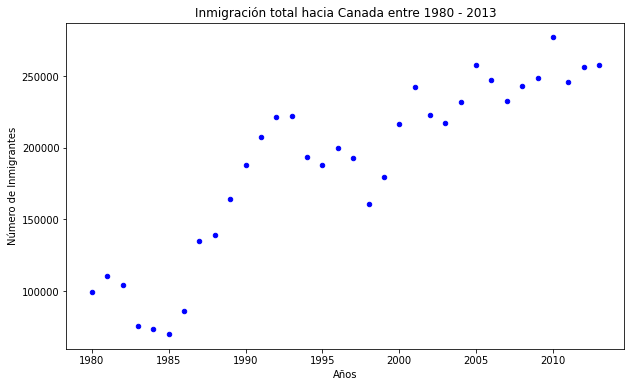

In [67]:
df_total.plot(kind= "scatter", x= "year", y="total", figsize=(10,6), color="blue")
plt.title("Inmigración total hacia Canada entre 1980 - 2013")
plt.xlabel("Años")
plt.ylabel("Número de Inmigrantes")
plt.show

In [68]:
X = df_total.iloc[:, :-1].values
y = df_total.iloc[:, 1].values

In [69]:
X

array([[1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013]], dtype=int64)

In [70]:
y

array([ 99137, 110563, 104271,  75550,  73417,  69978,  86048, 134771,
       139306, 164432, 188054, 207509, 221687, 222049, 193665, 187712,
       200085, 192885, 160727, 179818, 216712, 242643, 223111, 217297,
       232083, 257457, 247057, 232405, 243047, 248768, 276956, 246194,
       256222, 257537], dtype=int64)

In [71]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
#Recuperamos la intersección
print(regressor.intercept_)

-10927539.613549644


In [74]:
#La pendiente
print(regressor.coef_)

[5567.67132321]


In [75]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([179964.67625291, 202235.36154575, 246776.73213142, 241209.06080822,
       140990.97699045, 230073.7181618 , 213370.70419217])

In [76]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
0  187712 179964.676
1  179818 202235.362
2  232405 246776.732
3  247057 241209.061
4  139306 140990.977
5  232083 230073.718
6  242643 213370.704

Evaluación del modelo:

El último paso es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan los diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan comúnmente tres métricas de evaluación:

- El error absoluto medio (MAE)
- El error cuadrático medio (MSE)
- Root Mean Squared Error (RMSE)

In [77]:
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

In [78]:
mse(y_test, y_pred)

238149694.85543442

In [79]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [80]:
mape(y_test, y_pred)

5.61201979885878

In [81]:
def MDAPE(actual, predicted):
    return np.median(np.abs((actual - predicted) / actual)) * 100

In [82]:
MDAPE(y_test,y_pred) 

4.127239466356584

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 11907.273036075223
Mean Squared Error: 238149694.85543442
Root Mean Squared Error: 15432.099496032108


In [85]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.8302787496626315


### Regresión Lineal Simple - OLS 

In [86]:
model1= "year~total"
lm1 = smf.ols(formula =model1, data = df_total).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     131.6
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           7.10e-13
Time:                        22:53:34   Log-Likelihood:                -98.141
No. Observations:                  34   AIC:                             200.3
Df Residuals:                      32   BIC:                             203.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1969.2617      2.495    789.284      0.0

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
predictors = ["year"]
x = df_total[predictors]
y= df_total["total"]

lm= LinearRegression()
model= lm.fit(x,y)

In [89]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -10926195.245378148
betas = [5567.09228419]


In [90]:
model.predict(x)

array([ 96647.47731093, 102214.56959511, 107781.6618793 , 113348.75416348,
       118915.84644767, 124482.93873186, 130050.03101604, 135617.12330023,
       141184.21558442, 146751.3078686 , 152318.40015279, 157885.49243698,
       163452.58472116, 169019.67700535, 174586.76928953, 180153.86157372,
       185720.95385791, 191288.04614209, 196855.13842628, 202422.23071047,
       207989.32299465, 213556.41527884, 219123.50756302, 224690.59984721,
       230257.6921314 , 235824.78441558, 241391.87669977, 246958.96898396,
       252526.06126814, 258093.15355233, 263660.24583652, 269227.3381207 ,
       274794.43040489, 280361.52268908])

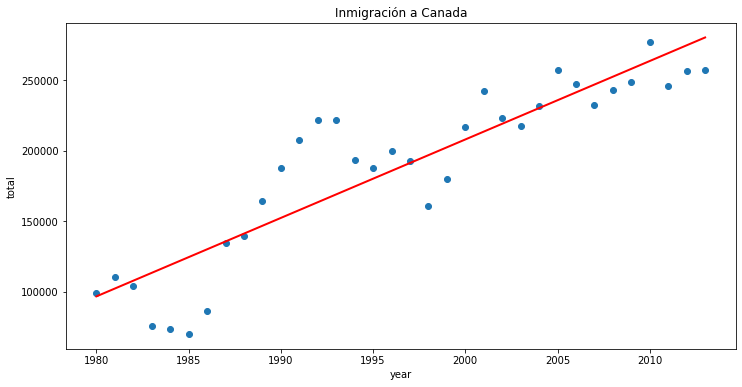

In [91]:
total_pred= model.predict(x)

plt.figure(figsize=(12,6))
plt.plot(df_total["year"],df_total["total"], 'o')
plt.plot(df_total["year"],total_pred,'r', linewidth=2)
plt.xlabel("year")
plt.ylabel("total")
plt.title("Inmigración a Canada")

plt.show()

In [92]:
x = df_total['year']      # año en el eje x
y = df_total['total']     # total en el eje y
ajuste = np.polyfit(x, y, deg=1)

ajuste

array([ 5.56709228e+03, -1.09261952e+07])

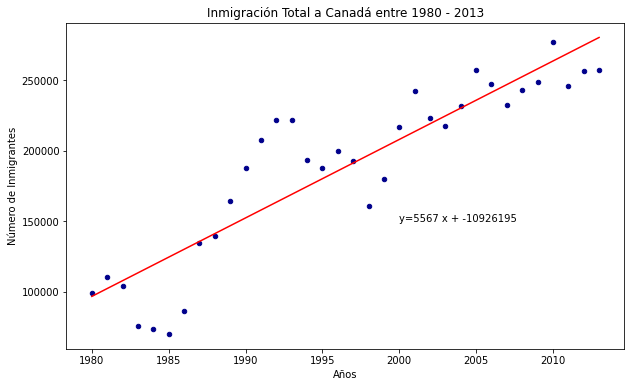

'Número de Inmigrantes = 5567 * Año + -10926195'

In [93]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Inmigración Total a Canadá entre 1980 - 2013')
plt.xlabel('Años')
plt.ylabel('Número de Inmigrantes')

# trazar la línea del mejor ajuste
plt.plot(x, ajuste[0] * x + ajuste[1], color='red') # recordar que x son los años
plt.annotate('y={0:.0f} x + {1:.0f}'.format(ajuste[0], ajuste[1]), xy=(2000, 150000))

plt.show()
'Número de Inmigrantes = {0:.0f} * Año + {1:.0f}'.format(ajuste[0], ajuste[1]) 



<p> Al usar la ecuación de recta de mejor ajuste, se puede estimar el número de inmigrantes en 2015:

```python
Nº Inmigrantes = 5567 * Año - 10926195
Nº Inmigrantes = 5567 * 2015 - 10926195
Nº Inmigrantes = 291.310
```

En comparación con el informe anual de 2016 de Citizenship and Immigration Canada (CIC) (https://www.canada.ca/en/immigration-refugees-citizenship/corporate/publications-manuals/annual-report-parliament-immigration-2016.html), se puede ver observar que Canadá aceptó 271.845 inmigrantes en 2015, que es bastante bueno. El valor estimado de 291,310 está dentro del 7% del número real, lo cual es bastante bueno considerando que nuestros datos originales provienen de las Naciones Unidas (y pueden diferir ligeramente de los datos de CIC).</p>




### A continuación resetablcemos el indice del df y utilizamos otros modelos para poder ver con otra variables.

In [94]:
df_can.reset_index()

index                                            Country  Cod_continet  \
0        0                                              India           935   
1        1                                              China           935   
2        2  United Kingdom of Great Britain and Northern I...           908   
3        3                                        Philippines           935   
4        4                                           Pakistan           935   
..     ...                                                ...           ...   
190    190                                      New Caledonia           909   
191    191                                         San Marino           908   
192    192                                             Canada           905   
193    193                              Sao Tome and Principe           903   
194    194                                     Western Sahara           903   

            Continent   REG              Region             DevName   1980  \
0                Asia  5501       Southern Asia  Developing regions   8880   
1                Asia   906        Eastern Asia  Developing regions   5123   
2              Europe   924     Northern Europe   Developed regions  22045   
3                Asia   920  South-Eastern Asia  Developing regions   6051   
4                Asia  5501       Southern Asia  Developing regions    978   
..                ...   ...                 ...                 ...    ...   
190           Oceania   928           Melanesia  Developing regions      0   
191            Europe   925     Southern Europe   Developed regions      1   
192  Northern America   905    Northern America   Developed regions      0   
193            Africa   911       Middle Africa  Developing regions      0   
194            Africa   912     Northern Africa  Developing regions      0   

      1981   1982   1983   1984  1985  1986   1987   1988   1989   1990  \
0     8670   8147   7338   5704  4211  7150  10189  11522  10343  12041   
1     6682   3308   1863   1527  1816  1960   2643   2758   4323   8076   
2    24796  20620  10015  10170  9564  9470  21337  27359  23795  31668   
3     5921   5249   4562   3801  3150  4166   7360   8639  11865  12509   
4      972   1201    900    668   514   691   1072   1334   2261   2470   
..     ...    ...    ...    ...   ...   ...    ...    ...    ...    ...   
190      0      0      0      0     0     0      0      0      0      0   
191      0      0      0      0     0     1      0      0      0      1   
192      0      0      0      0     0     0      0      0      0      3   
193      0      0      0      0     0     0      0      0      0      0   
194      0      0      0      0     0     0      0      0      0      0   

      1991   1992   1993   1994   1995   1996   1997   1998   1999   2000  \
0    13734  13673  21496  18620  18489  23859  22268  17241  18974  28572   
1    14255  10846   9817  13128  14398  19415  20475  21049  30069  35529   
2    23380  34123  33720  39231  30145  29322  22965  10367   7045   8840   
3    12718  13670  20479  19532  15864  13692  11549   8735   9734  10763   
4     3079   4071   4777   4666   4994   9125  13073   9068   9979  15400   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      0      0      0      0      0      0      0      0      0   
191      0      0      0      0      0      0      0      0      0      0   
192      3      4      3      1      1      1      0      0      0      0   
193      0      0      0      0      0      0      2      0      0      1   
194      1      0      0      0      0      0      0      0      0      0   

      2001   2002   2003   2004   2005   2006   2007   2008   2009   2010  \
0    31223  31889  27155  28235  36210  33848  28742  28261  29456  34235   
1    36434  31961  36439  36619  42584  33518  27642  30037  29622  30391   
2    11728   8046   6797   7533   7258   7140   8216   8979   

In [95]:
df_can = pd.get_dummies(df_can, columns=["Continent", "Region", "DevName"])

<AxesSubplot:>

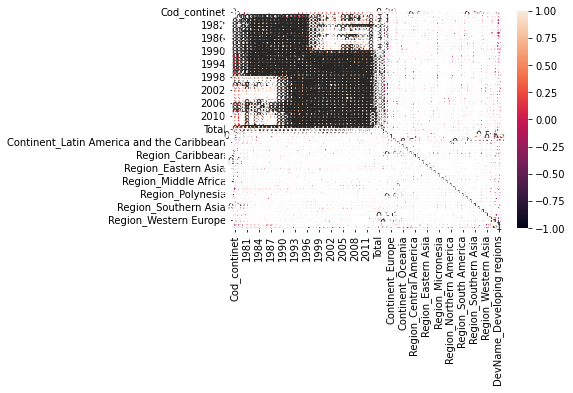

In [96]:
corr_matrix = df_can.corr()
sns.heatmap(corr_matrix, annot=True)

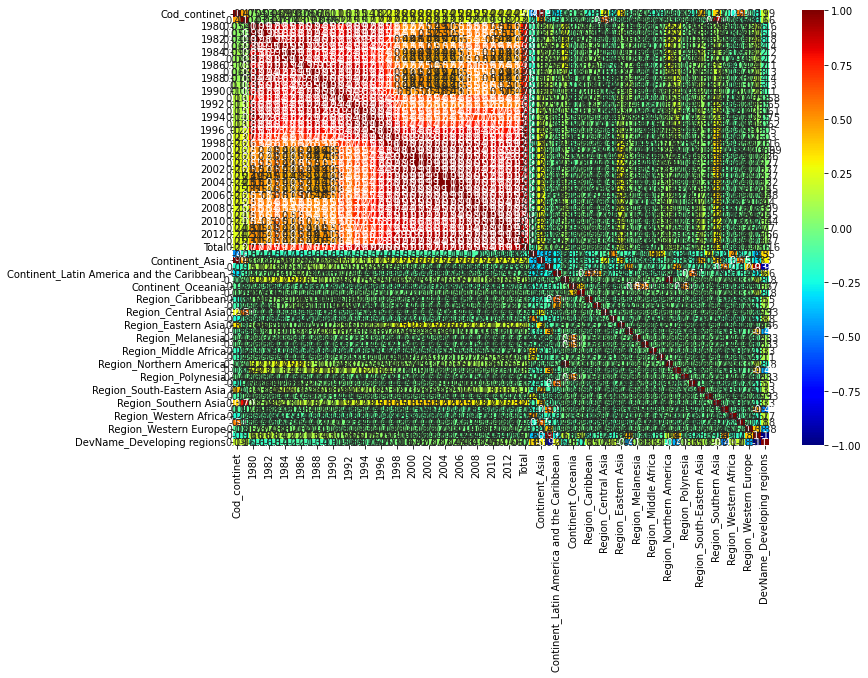

In [97]:
plt.figure(figsize=(12, 8))
df_corr = df_can.corr()
sns.heatmap(df_corr, 
           # xticklabels = df_corr.columns.values,
            #yticklabels = df_corr.columns.values,
            annot = True,cmap='jet');

In [98]:
df_can.columns

Index(['Country', 'Cod_continet', 'REG', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total', 'Continent_Africa', 'Continent_Asia',
       'Continent_Europe', 'Continent_Latin America and the Caribbean',
       'Continent_Northern America', 'Continent_Oceania',
       'Region_Australia and New Zealand', 'Region_Caribbean',
       'Region_Central America', 'Region_Central Asia',
       'Region_Eastern Africa', 'Region_Eastern Asia', 'Region_Eastern Europe',
       'Region_Melanesia', 'Region_Micronesia', 'Region_Middle Africa',
       'Region_Northern Africa', 'Region_Northern America',
       'Region_Northern Europe', 'Region_Polynesia', 'Region_South America',
       'Region_South-Eastern Asia', 'Region_Southern Africa',
       'Regi

In [99]:
X = df_can[['Continent_Africa', 'Continent_Asia', 'Continent_Europe',
       'Continent_Latin America and the Caribbean',
       'Continent_Northern America', 'Continent_Oceania',
       'Region_Australia and New Zealand', 'Region_Caribbean',
       'Region_Central America', 'Region_Central Asia',
       'Region_Eastern Africa', 'Region_Eastern Asia',
       'Region_Eastern Europe', 'Region_Melanesia', 'Region_Micronesia',
       'Region_Middle Africa', 'Region_Northern Africa',
       'Region_Northern America', 'Region_Northern Europe',
       'Region_Polynesia', 'Region_South America',
       'Region_South-Eastern Asia', 'Region_Southern Africa',
       'Region_Southern Asia', 'Region_Southern Europe',
       'Region_Western Africa', 'Region_Western Asia',
       'Region_Western Europe']]
y = df_can["Total"]

In [100]:
X

Continent_Africa  Continent_Asia  Continent_Europe  \
0                   0               1                 0   
1                   0               1                 0   
2                   0               0                 1   
3                   0               1                 0   
4                   0               1                 0   
..                ...             ...               ...   
190                 0               0                 0   
191                 0               0                 1   
192                 0               0                 0   
193                 1               0                 0   
194                 1               0                 0   

     Continent_Latin America and the Caribbean  Continent_Northern America  \
0                                            0                           0   
1                                            0                           0   
2                                            0                           0   
3                                            0                           0   
4                                            0                           0   
..                                         ...                         ...   
190                                          0                           0   
191                                          0                           0   
192                                          0                           1   
193                                          0                           0   
194                                          0                           0   

     Continent_Oceania  Region_Australia and New Zealand  Region_Caribbean  \
0                    0                                 0                 0   
1                    0                                 0                 0   
2                    0                                 0                 0   
3                    0                                 0                 0   
4                    0                                 0                 0   
..                 ...                               ...               ...   
190                  1                                 0                 0   
191                  0                                 0                 0   
192                  0                                 0                 0   
193                  0                                 0                 0   
194                  0                                 0                 0   

     Region_Central America  Region_Central Asia  Region_Eastern Africa  \
0                         0                    0                      0   
1                         0                    0                      0   
2                         0                    0                      0   
3                         0                    0                      0   
4                         0                    0                      0   
..                      ...                  ...                    ...   
190                       0                    0                      0   
191                       0                    0                      0   
192                       0                    0                      0   
193                       0                    0                      0   
194                       0                    0                      0   

     Region_Eastern Asia  Region_Eastern Europe  Region_Melanesia  \
0                      0                      0                 0   
1                      1                      0                 0   
2                      0                      0                 0   
3                      0                      0                 0   
4                      0                      0                 0   
..                   ...                    ...               ...   
190                    0              

In [101]:
y

0      698340
1      661803
2      553332
3      513246
4      248036
        ...  
190      1842
191      1838
192      1830
193      1824
194      1817
Name: Total, Length: 195, dtype: int64

In [102]:
df_can.drop(['Country'], axis=1, inplace=True)

In [103]:
data = df_can.values
X,y = data[:,:35], data[:, 35]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle=True)

In [104]:
data

array([[  935,  5501,  8880, ...,     0,     0,     1],
       [  935,   906,  5123, ...,     0,     0,     1],
       [  908,   924, 22045, ...,     0,     1,     0],
       ...,
       [  905,   905,     0, ...,     0,     1,     0],
       [  903,   911,     0, ...,     0,     0,     1],
       [  903,   912,     0, ...,     0,     0,     1]], dtype=int64)

In [105]:
print(X_train.shape, X_test.shape)

(156, 35) (39, 35)


In [106]:
from sklearn.ensemble import RandomForestRegressor

#### Random forest es un algoritmo de aprendizaje automático, lo utilizamos ya que maneja problemas de clasificación y regresión.

In [107]:
# Modelo
model2 = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)

In [108]:
model2

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [109]:
# Ajuste
model2.fit(X_train,y_train)#pasas a get_dumies

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [110]:
predicciones= model2.predict(X_test)
predicciones[0:5]

array([ 90.43021902, 259.92162389,  90.43021902,  90.43021902,
        90.43021902])

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [112]:
print('MSE: ',mean_squared_error(y_test, y_pred = predicciones))

MSE:  74514.79562123303


In [113]:
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))

MAE:  151.36665236582422


In [114]:
print('R2: ',r2_score(y_true = y_test, y_pred= predicciones))

R2:  0.9222112128222034


---

### SVM

Se analiza dos variables a predecir para poder determinar, una es el total de inmigraciones y el segundo poder predecir si va si a ser un pais en desarrollo o subdesarrollado

In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [116]:
df_can.drop(["Cod_continet","REG"], axis=1, inplace=True)

In [117]:
X = df_can.drop(columns = 'Total')
y = df_can['Total']

In [118]:
X

1980   1981   1982   1983   1984  1985  1986   1987   1988   1989  \
0     8880   8670   8147   7338   5704  4211  7150  10189  11522  10343   
1     5123   6682   3308   1863   1527  1816  1960   2643   2758   4323   
2    22045  24796  20620  10015  10170  9564  9470  21337  27359  23795   
3     6051   5921   5249   4562   3801  3150  4166   7360   8639  11865   
4      978    972   1201    900    668   514   691   1072   1334   2261   
..     ...    ...    ...    ...    ...   ...   ...    ...    ...    ...   
190      0      0      0      0      0     0     0      0      0      0   
191      1      0      0      0      0     0     1      0      0      0   
192      0      0      0      0      0     0     0      0      0      0   
193      0      0      0      0      0     0     0      0      0      0   
194      0      0      0      0      0     0     0      0      0      0   

      1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  \
0    12041  13734  13673  21496  18620  18489  23859  22268  17241  18974   
1     8076  14255  10846   9817  13128  14398  19415  20475  21049  30069   
2    31668  23380  34123  33720  39231  30145  29322  22965  10367   7045   
3    12509  12718  13670  20479  19532  15864  13692  11549   8735   9734   
4     2470   3079   4071   4777   4666   4994   9125  13073   9068   9979   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      0      0      0      0      0      0      0      0      0   
191      1      0      0      0      0      0      0      0      0      0   
192      3      3      4      3      1      1      1      0      0      0   
193      0      0      0      0      0      0      0      2      0      0   
194      0      1      0      0      0      0      0      0      0      0   

      2000   2001   2002   2003   2004   2005   2006   2007   2008   2009  \
0    28572  31223  31889  27155  28235  36210  33848  28742  28261  29456   
1    35529  36434  31961  36439  36619  42584  33518  27642  30037  29622   
2     8840  11728   8046   6797   7533   7258   7140   8216   8979   8876   
3    10763  13836  11707  12758  14004  18139  18400  19837  24887  28573   
4    15400  16708  15110  13205  13399  14314  13127  10124   8994   7217   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      1      0      1      0      0      0      0      1      0   
191      0      0      0      1      0      0      0      0      0      0   
192      0      0      0      0      0      0      0      0      0      0   
193      1      0      0      0      1      1      1      0      0      1   
194      0      0      0      0      0      0      1      0      0      0   

      2010   2011   2012   2013  Continent_Africa  Continent_Asia  \
0    34235  27509  30933  33087                 0               1   
1    30391  28502  33024  34129                 0               1   
2     8724   6204   6195   5827                 0               0   
3    38617  36765  34315  29544                 0               1   
4     6811   7468  11227  12603                 0               1   
..     ...    ...    ...    ...               ...             ...   
190      0      0      0      2                 0               0   
191      1      0      0      0                 0               0   
192      0      1      1      2                 0               0   
193      2      0      0      1                 1               0   
194      0      0      0      0                 1               0   

     Continent_Europe  Continent_Latin America and the Caribbean  \
0                   0                                          0   
1                   0                                          0   
2                   1                                          0   
3                   0                                          0   
4                   0                                          0   
..                

In [119]:
y

0      698340
1      661803
2      553332
3      513246
4      248036
        ...  
190      1842
191      1838
192      1830
193      1824
194      1817
Name: Total, Length: 195, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

In [121]:
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [122]:
y_test_pred = modelo.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.0

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred) 

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [125]:
from sklearn.metrics import classification_report
reporte=classification_report(y_test,y_test_pred)
print(reporte)

              precision    recall  f1-score   support

        1830       0.00      0.00      0.00       1.0
        1842       0.00      0.00      0.00       1.0
        1848       0.00      0.00      0.00       0.0
        1864       0.00      0.00      0.00       0.0
        1872       0.00      0.00      0.00       1.0
        1973       0.00      0.00      0.00       0.0
        2004       0.00      0.00      0.00       1.0
        2007       0.00      0.00      0.00       0.0
        2008       0.00      0.00      0.00       0.0
        2014       0.00      0.00      0.00       1.0
        2018       0.00      0.00      0.00       1.0
        2049       0.00      0.00      0.00       1.0
        2081       0.00      0.00      0.00       0.0
        2107       0.00      0.00      0.00       1.0
        2125       0.00      0.00      0.00       1.0
        2136       0.00      0.00      0.00       0.0
        2332       0.00      0.00      0.00       0.0
        2356       0.00    

In [126]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [127]:
#Prediccion en Test
y_test_pred = model.predict(X_test) 
reporte=classification_report(y_test,y_test_pred)
print(reporte)

              precision    recall  f1-score   support

        1830       0.00      0.00      0.00       1.0
        1842       0.00      0.00      0.00       1.0
        1864       0.00      0.00      0.00       0.0
        1872       0.00      0.00      0.00       1.0
        1874       0.00      0.00      0.00       0.0
        1900       0.00      0.00      0.00       0.0
        1923       0.00      0.00      0.00       0.0
        1938       0.00      0.00      0.00       0.0
        1973       0.00      0.00      0.00       0.0
        2004       0.00      0.00      0.00       1.0
        2008       0.00      0.00      0.00       0.0
        2014       0.00      0.00      0.00       1.0
        2018       0.00      0.00      0.00       1.0
        2049       0.00      0.00      0.00       1.0
        2081       0.00      0.00      0.00       0.0
        2107       0.00      0.00      0.00       1.0
        2125       0.00      0.00      0.00       1.0
        2229       0.00    

In [128]:
X = df_can.drop("DevName_Developed regions", axis=1)
y = df_can["DevName_Developed regions"]

In [129]:
X

1980   1981   1982   1983   1984  1985  1986   1987   1988   1989  \
0     8880   8670   8147   7338   5704  4211  7150  10189  11522  10343   
1     5123   6682   3308   1863   1527  1816  1960   2643   2758   4323   
2    22045  24796  20620  10015  10170  9564  9470  21337  27359  23795   
3     6051   5921   5249   4562   3801  3150  4166   7360   8639  11865   
4      978    972   1201    900    668   514   691   1072   1334   2261   
..     ...    ...    ...    ...    ...   ...   ...    ...    ...    ...   
190      0      0      0      0      0     0     0      0      0      0   
191      1      0      0      0      0     0     1      0      0      0   
192      0      0      0      0      0     0     0      0      0      0   
193      0      0      0      0      0     0     0      0      0      0   
194      0      0      0      0      0     0     0      0      0      0   

      1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  \
0    12041  13734  13673  21496  18620  18489  23859  22268  17241  18974   
1     8076  14255  10846   9817  13128  14398  19415  20475  21049  30069   
2    31668  23380  34123  33720  39231  30145  29322  22965  10367   7045   
3    12509  12718  13670  20479  19532  15864  13692  11549   8735   9734   
4     2470   3079   4071   4777   4666   4994   9125  13073   9068   9979   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      0      0      0      0      0      0      0      0      0   
191      1      0      0      0      0      0      0      0      0      0   
192      3      3      4      3      1      1      1      0      0      0   
193      0      0      0      0      0      0      0      2      0      0   
194      0      1      0      0      0      0      0      0      0      0   

      2000   2001   2002   2003   2004   2005   2006   2007   2008   2009  \
0    28572  31223  31889  27155  28235  36210  33848  28742  28261  29456   
1    35529  36434  31961  36439  36619  42584  33518  27642  30037  29622   
2     8840  11728   8046   6797   7533   7258   7140   8216   8979   8876   
3    10763  13836  11707  12758  14004  18139  18400  19837  24887  28573   
4    15400  16708  15110  13205  13399  14314  13127  10124   8994   7217   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      1      0      1      0      0      0      0      1      0   
191      0      0      0      1      0      0      0      0      0      0   
192      0      0      0      0      0      0      0      0      0      0   
193      1      0      0      0      1      1      1      0      0      1   
194      0      0      0      0      0      0      1      0      0      0   

      2010   2011   2012   2013   Total  Continent_Africa  Continent_Asia  \
0    34235  27509  30933  33087  698340                 0               1   
1    30391  28502  33024  34129  661803                 0               1   
2     8724   6204   6195   5827  553332                 0               0   
3    38617  36765  34315  29544  513246                 0               1   
4     6811   7468  11227  12603  248036                 0               1   
..     ...    ...    ...    ...     ...               ...             ...   
190      0      0      0      2    1842                 0               0   
191      1      0      0      0    1838                 0               0   
192      0      1      1      2    1830                 0               0   
193      2      0      0      1    1824                 1               0   
194      0      0      0      0    1817                 1               0   

     Continent_Europe  Continent_Latin America and the Caribbean  \
0                   0                                          0   
1                   0                                          0   
2                   1                                          0   
3                   0                                     

In [130]:
y

0      0
1      0
2      1
3      0
4      0
      ..
190    0
191    1
192    1
193    0
194    0
Name: DevName_Developed regions, Length: 195, dtype: uint8

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

In [132]:
modelo = SVC(C = 100, kernel = 'linear', random_state=42)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [133]:
accuracy_score(y_test,y_test_pred)

0.0

In [134]:
confusion_matrix(y_test, y_test_pred) 

array([[0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [135]:
reporte=classification_report(y_test,y_test_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      44.0
           1       0.00      0.00      0.00      15.0
        1864       0.00      0.00      0.00       0.0
        1874       0.00      0.00      0.00       0.0
        1900       0.00      0.00      0.00       0.0
        1923       0.00      0.00      0.00       0.0
        1938       0.00      0.00      0.00       0.0
        1973       0.00      0.00      0.00       0.0
        2008       0.00      0.00      0.00       0.0
        2081       0.00      0.00      0.00       0.0
        2229       0.00      0.00      0.00       0.0
        2766       0.00      0.00      0.00       0.0
        2767       0.00      0.00      0.00       0.0
        2793       0.00      0.00      0.00       0.0
        2944       0.00      0.00      0.00       0.0
        3779       0.00      0.00      0.00       0.0
        3882       0.00      0.00      0.00       0.0
        3927       0.00    

In [136]:
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [137]:
y_test_pred = model.predict(X_test) 
reporte=classification_report(y_test,y_test_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.80      0.89        15

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



---

#### Se introduce nuevas medidas para poder analizar si mejora los resultados del modelo

In [138]:
df_can['Promedio'] = df_can.mean(axis=1, numeric_only=True)

In [139]:
df_can['Mediana'] = df_can.median(axis=1, numeric_only=True)

In [140]:
df_can

1980   1981   1982   1983   1984  1985  1986   1987   1988   1989  \
0     8880   8670   8147   7338   5704  4211  7150  10189  11522  10343   
1     5123   6682   3308   1863   1527  1816  1960   2643   2758   4323   
2    22045  24796  20620  10015  10170  9564  9470  21337  27359  23795   
3     6051   5921   5249   4562   3801  3150  4166   7360   8639  11865   
4      978    972   1201    900    668   514   691   1072   1334   2261   
..     ...    ...    ...    ...    ...   ...   ...    ...    ...    ...   
190      0      0      0      0      0     0     0      0      0      0   
191      1      0      0      0      0     0     1      0      0      0   
192      0      0      0      0      0     0     0      0      0      0   
193      0      0      0      0      0     0     0      0      0      0   
194      0      0      0      0      0     0     0      0      0      0   

      1990   1991   1992   1993   1994   1995   1996   1997   1998   1999  \
0    12041  13734  13673  21496  18620  18489  23859  22268  17241  18974   
1     8076  14255  10846   9817  13128  14398  19415  20475  21049  30069   
2    31668  23380  34123  33720  39231  30145  29322  22965  10367   7045   
3    12509  12718  13670  20479  19532  15864  13692  11549   8735   9734   
4     2470   3079   4071   4777   4666   4994   9125  13073   9068   9979   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      0      0      0      0      0      0      0      0      0   
191      1      0      0      0      0      0      0      0      0      0   
192      3      3      4      3      1      1      1      0      0      0   
193      0      0      0      0      0      0      0      2      0      0   
194      0      1      0      0      0      0      0      0      0      0   

      2000   2001   2002   2003   2004   2005   2006   2007   2008   2009  \
0    28572  31223  31889  27155  28235  36210  33848  28742  28261  29456   
1    35529  36434  31961  36439  36619  42584  33518  27642  30037  29622   
2     8840  11728   8046   6797   7533   7258   7140   8216   8979   8876   
3    10763  13836  11707  12758  14004  18139  18400  19837  24887  28573   
4    15400  16708  15110  13205  13399  14314  13127  10124   8994   7217   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
190      0      1      0      1      0      0      0      0      1      0   
191      0      0      0      1      0      0      0      0      0      0   
192      0      0      0      0      0      0      0      0      0      0   
193      1      0      0      0      1      1      1      0      0      1   
194      0      0      0      0      0      0      1      0      0      0   

      2010   2011   2012   2013   Total  Continent_Africa  Continent_Asia  \
0    34235  27509  30933  33087  698340                 0               1   
1    30391  28502  33024  34129  661803                 0               1   
2     8724   6204   6195   5827  553332                 0               0   
3    38617  36765  34315  29544  513246                 0               1   
4     6811   7468  11227  12603  248036                 0               1   
..     ...    ...    ...    ...     ...               ...             ...   
190      0      0      0      2    1842                 0               0   
191      1      0      0      0    1838                 0               0   
192      0      1      1      2    1830                 0               0   
193      2      0      0      1    1824                 1               0   
194      0      0      0      0    1817                 1               0   

     Continent_Europe  Continent_Latin America and the Caribbean  \
0                   0                                          0   
1                   0                                          0   
2                   1                                          0   
3                   0                                     

In [141]:
data = df_can.values
X,y = data[:,:35], data[:, 35]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, shuffle=True)

In [142]:
print(X_train.shape, X_test.shape)

(156, 35) (39, 35)


In [143]:
# Modelo
model2 =RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)

In [144]:
# Ajuste
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [145]:
predic= model2.predict(X_test)
predic[0:5]

array([0.38848771, 0.09408369, 0.41197115, 0.48210566, 0.22424242])

In [146]:
print('MSE: ',mean_squared_error(y_true= y_test, y_pred = predicciones))

MSE:  1774944.599834891


In [147]:
print('MAE: ',mean_absolute_error(y_true= y_test, y_pred= predicciones))

MAE:  704.8798194876059


In [148]:
print('R2: ',r2_score(y_true = y_test, y_pred= predicciones))

R2:  -9309277.401202995


#### Analisis

Para la mejora de este proyecto creos que podría ser bastante interesante poder analizar otras variables con la finalidad de ver cómo se comportan con otros modelos y asi poder brindar un mejor analisis. Seguire avanzando con el proyecto hasta poder realizar un aplicacion para precedir la inmigración a Cánada.

#### Agradecimiento

Quiero agradecer la buena predisposición y ayuda del tutor y docente, que con las consultas y clases me han guiado a través de este aprendizaje, me brindo herramientas a lo largo del cursado poder resolver los problemas que se me presentaron, seguramente no todo he podido plasmar en el trabajo, pero he dado todo para poder finalizarlo. 